Reset variables before starting notebook

In [2]:
# reset
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


Import packages necessary to run code

In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import cobra as cb

Load model iYL1228 (Klebsiella pneumoniae subsp. pneumoniae MGH 7857) from BiGG Models

In [4]:
# load pneumonia model
pneu_model = cb.io.read_sbml_model('iYL1228.xml')

In [5]:
# load pneumonia model for rich environment
pneu2_model = cb.io.read_sbml_model('iYL1228.xml')

In [6]:
# show model
pneu_model

Name,iYL1228
Memory address,1589a6d70
Number of metabolites,1658
Number of reactions,2262
Number of genes,1229
Number of groups,0
Objective expression,1.0*BIOMASS_ - 1.0*BIOMASS__reverse_091e5
Compartments,"periplasm, cytosol, extracellular space"


In [7]:
# show model for pneu2 to verify they're the same
pneu2_model

Name,iYL1228
Memory address,11252bd30
Number of metabolites,1658
Number of reactions,2262
Number of genes,1229
Number of groups,0
Objective expression,1.0*BIOMASS_ - 1.0*BIOMASS__reverse_091e5
Compartments,"periplasm, cytosol, extracellular space"


In [8]:
# model reactions of pneumonia on glucose environment
pneu_model.reactions.get_by_id('GLCabcpp')

Reaction identifier,GLCabcpp
Name,D-glucose transport via ABC system (periplasm)
Memory address,0x15b22a590
Stoichiometry,atp_c + glc__D_p + h2o_c --> adp_c + glc__D_c + h_c + pi_c ATP C10H12N5O13P3 + D-Glucose + H2O H2O --> ADP C10H12N5O10P2 + D-Glucose + H+ + Phosphate
GPR,KPN_02586 and KPN_02587 and KPN_02588
Lower bound,0.0
Upper bound,1000.0


Define the minimal environment for glucose minimale media. This consists of limiting the lower and upper bounds and only allowing certain exchanges.

In [9]:
# Define minimal environment

# Set a blank slate
for ex in pneu_model.exchanges:
    ex.lower_bound = 0
    ex.upper_bound = 1000
    
# glucose minimal medium
glc_min_med = ['EX_pi_e','EX_co2_e','EX_fe3_e','EX_h_e','EX_mn2_e','EX_fe2_e','EX_glc__D_e','EX_zn2_e',
               'EX_mg2_e','EX_ca2_e','EX_ni2_e','EX_cu2_e','EX_cobalt2_e','EX_h2o_e','EX_mobd_e',
               'EX_so4_e','EX_nh4_e','EX_k_e','EX_na1_e','EX_cl_e','EX_o2_e','EX_tungs_e']

for ex_id in glc_min_med:
    pneu_model.exchanges.get_by_id(ex_id).lower_bound = -1000
    print(pneu_model.exchanges.get_by_id(ex_id).id, pneu_model.exchanges.get_by_id(ex_id).name)

# set glucose exchange lower bound to -18.5
pneu_model.exchanges.get_by_id('EX_glc__D_e').lower_bound = -18.5

EX_pi_e Phosphate exchange
EX_co2_e CO2 exchange
EX_fe3_e Fe3+ exchange
EX_h_e H+ exchange
EX_mn2_e Mn2+ exchange
EX_fe2_e Fe2+ exchange
EX_glc__D_e D-Glucose exchange
EX_zn2_e Zinc exchange
EX_mg2_e Mg exchange
EX_ca2_e Calcium exchange
EX_ni2_e Ni2+ exchange
EX_cu2_e Cu2+ exchange
EX_cobalt2_e Co2+ exchange
EX_h2o_e H2O exchange
EX_mobd_e Molybdate exchange
EX_so4_e Sulfate exchange
EX_nh4_e Ammonia exchange
EX_k_e K+ exchange
EX_na1_e Sodium exchange
EX_cl_e Chloride exchange
EX_o2_e O2 exchange
EX_tungs_e Tungstate exchange


Calculate pneumonia flux value for glucose minimal environment

In [10]:
# Simulate minimal flux
pneu_model.objective = 'BIOMASS_'
solution = pneu_model.optimize()
print(solution.objective_value)

1.8651538072780198


Iterate through all genes in the pneumonia model in the minimal environment and simulate gene knockout.

In [11]:
for i, gene in enumerate(pneu_model.genes):
 with pneu_model:
  pneu_model.genes[i].knock_out() # Knock out gene by position in the list
  solution = pneu_model.optimize()
  if solution.objective_value < 1.8:
    print('Gene:', gene, gene.name)
    print('Biomass Flux Knock Out (',gene.name,'):', solution.objective_value)

Gene: KPN_00004 thrC
Biomass Flux Knock Out ( thrC ): 2.982668625337597e-15
Gene: KPN_01092 acpP
Biomass Flux Knock Out ( acpP ): 2.484072169036617e-14
Gene: KPN_03799 asd
Biomass Flux Knock Out ( asd ): -7.32860364755231e-15
Gene: KPN_SPONT KPN_SPONT
Biomass Flux Knock Out ( KPN_SPONT ): 3.100575846969061e-16
Gene: KPN_02706 accD
Biomass Flux Knock Out ( accD ): 1.4975085102242872e-15
Gene: KPN_03664 accB
Biomass Flux Knock Out ( accB ): -2.5606166888607577e-14
Gene: KPN_00198 accA
Biomass Flux Knock Out ( accA ): -2.57785641571098e-14
Gene: KPN_03665 accC
Biomass Flux Knock Out ( accC ): -5.241677181405186e-15
Gene: KPN_04248 argB
Biomass Flux Knock Out ( argB ): 2.2879434498868837e-15
Gene: KPN_00983 fabA
Biomass Flux Knock Out ( fabA ): 5.682658209852708e-14
Gene: KPN_03226 argA
Biomass Flux Knock Out ( argA ): 2.546691090421453e-14
Gene: KPN_01091 fabG
Biomass Flux Knock Out ( fabG ): 3.4262355086344066e-14
Gene: KPN_01093 fabF
Biomass Flux Knock Out ( fabF ): -1.1530033170399966e

Define the rich environment for the pneumonia by setting a negative lower bound and not having an upper bound

In [12]:
# Define Rich Environment
for exchanges in pneu2_model.exchanges:
	exchanges.lower_bound = -1000

Calculate the flux value for when the pneumonia is in the rich environment.

In [13]:
# Simulate rich flux
pneu2_model.objective = 'BIOMASS_'
solution = pneu2_model.optimize()
print(solution.objective_value)

66.73975890148476


Iterate through all genes in the pneumonia model in the rich environment and simulate gene knockout. 

In [14]:
for i, gene in enumerate(pneu2_model.genes):
 with pneu2_model:
  pneu2_model.genes[i].knock_out() # Knock out gene by position in the list
  solution = pneu2_model.optimize()
  if solution.objective_value < 66.7:
    print('Gene:', gene, gene.name)
    print('Biomass Flux Knock Out (',gene.name,'):', solution.objective_value)

Gene: KPN_02193 oppF
Biomass Flux Knock Out ( oppF ): 66.68093534341038
Gene: KPN_02195 oppC
Biomass Flux Knock Out ( oppC ): 66.68093534341052
Gene: KPN_01092 acpP
Biomass Flux Knock Out ( acpP ): 1.311906877509515e-13
Gene: KPN_SPONT KPN_SPONT
Biomass Flux Knock Out ( KPN_SPONT ): 46.02401830035771
Gene: KPN_02706 accD
Biomass Flux Knock Out ( accD ): 0.0
Gene: KPN_03664 accB
Biomass Flux Knock Out ( accB ): 0.0
Gene: KPN_00198 accA
Biomass Flux Knock Out ( accA ): 0.0
Gene: KPN_03665 accC
Biomass Flux Knock Out ( accC ): -4.261249455221993e-16
Gene: KPN_03245 aas
Biomass Flux Knock Out ( aas ): 65.89997781821423
Gene: KPN_01906 ansP
Biomass Flux Knock Out ( ansP ): 66.55827508762232
Gene: KPN_01091 fabG
Biomass Flux Knock Out ( fabG ): -3.152190813182489e-14
Gene: KPN_02196 oppB
Biomass Flux Knock Out ( oppB ): 66.68093534341033
Gene: KPN_02194 oppD
Biomass Flux Knock Out ( oppD ): 66.68093534341033
Gene: KPN_04143 atpB
Biomass Flux Knock Out ( atpB ): 53.373629184773364
Gene: KPN_0

Create a list of genes that are essential in both the minimal and rich enviroment

In [15]:
# Find that are essential in both models
common_genes = []
for gene_name in pneu2_model.genes:
    # Check if gene_name exists in pneu_model.genes
    if gene_name.id in [gene.id for gene in pneu_model.genes]:  # Check by ID
        pneu2_flux = None
        pneu_flux = None

        # Find the corresponding gene object in pneu_model by ID
        pneu_gene = pneu_model.genes.get_by_id(gene_name.id)

        if pneu_gene is not None:
            with pneu2_model:
                pneu2_model.genes.get_by_id(gene_name.id).knock_out()
                solution = pneu2_model.optimize()
                pneu2_flux = solution.objective_value

            with pneu_model:
                pneu_gene.knock_out()  # Knock out by gene object
                solution = pneu_model.optimize()
                pneu_flux = solution.objective_value
        else:
            print(f"Gene {gene_name.id} not found in pneu_model")

        # Check knockout fluxes if successfully obtained
        if pneu2_flux is not None and pneu_flux is not None:
            if pneu2_flux < 66.7 and pneu_flux < 1.8:
                common_genes.append((gene_name.id, pneu_gene.name))

# Print essential common genes
if common_genes:
    print("Genes with knockout effects in both models below thresholds:")
    for gene_id, gene_name in common_genes:
        print(f"Gene ID: {gene_id}, Gene Name: {gene_name}")
else:
    print("No genes found with knockout effects in both models below thresholds.")

Genes with knockout effects in both models below thresholds:
Gene ID: KPN_01092, Gene Name: acpP
Gene ID: KPN_SPONT, Gene Name: KPN_SPONT
Gene ID: KPN_02706, Gene Name: accD
Gene ID: KPN_03664, Gene Name: accB
Gene ID: KPN_00198, Gene Name: accA
Gene ID: KPN_03665, Gene Name: accC
Gene ID: KPN_01091, Gene Name: fabG
Gene ID: KPN_04143, Gene Name: atpB
Gene ID: KPN_04142, Gene Name: atpE
Gene ID: KPN_04137, Gene Name: atpD
Gene ID: KPN_04141, Gene Name: atpF
Gene ID: KPN_04138, Gene Name: atpG
Gene ID: KPN_04136, Gene Name: atpC
Gene ID: KPN_04140, Gene Name: atpH
Gene ID: KPN_04139, Gene Name: atpA
Gene ID: KPN_03963, Gene Name: hldD
Gene ID: KPN_03436, Gene Name: plsC
Gene ID: KPN_03453, Gene Name: ygiE
Gene ID: KPN_01096, Gene Name: tmk
Gene ID: KPN_00941, Gene Name: msbA
Gene ID: KPN_03123, Gene Name: eno
Gene ID: KPN_02492, Gene Name: uge
Gene ID: KPN_00188, Gene Name: cdsA
Gene ID: KPN_03996, Gene Name: gmk
Gene ID: KPN_04135, Gene Name: glmU
Gene ID: KPN_01090, Gene Name: fabD
Ge

Generate a graph including fluxes of common essential genes in the minimal and rich environment and save as png

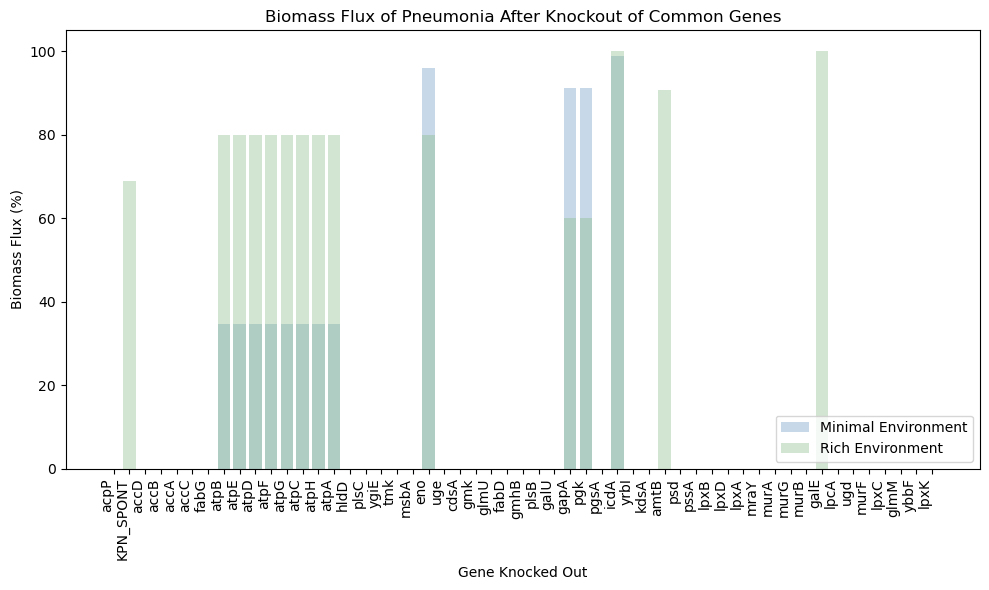

In [16]:
# Function to normalize flux values as percentage
def normalize_fluxes(fluxes, reference_flux):
    return [(flux / reference_flux) * 100 for flux in fluxes]

# Extract gene names and knockout fluxes separately for pneu_model
gene_names = [gene_name[1] for gene_name in common_genes]
knockout_fluxes = []
reference_flux_pneu = 1.8  # Reference flux of 100% for pneu_model (minimal environment)
for i, gene in enumerate(common_genes):
    with pneu_model:
        pneu_model.genes.get_by_id(gene[0]).knock_out()
        solution = pneu_model.optimize()
        if solution.objective_value < reference_flux_pneu:
            knockout_fluxes.append(solution.objective_value)

# Normalize the fluxes as percentages for minimal environment
knockout_fluxes_percent_pneu = normalize_fluxes(knockout_fluxes, reference_flux_pneu)

# Create the graph for minimal
plt.figure(figsize=(10, 6))
plt.bar(gene_names, knockout_fluxes_percent_pneu, color="steelblue", alpha = 0.3, label="Minimal Environment")
plt.xlabel("Gene Knocked Out")
plt.ylabel("Biomass Flux (%)")
plt.title("Biomass Flux of Pneumonia After Knockout of Common Genes in Minimal Environment")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.tight_layout()

# Extract gene names and knockout fluxes separately for pneu2_model
knockout_fluxes = []
reference_flux_pneu2 = 66.7  # Reference flux of 100% for pneu2_model (rich environemt)
for i, gene in enumerate(common_genes):
    with pneu2_model:
        pneu2_model.genes.get_by_id(gene[0]).knock_out()
        solution = pneu2_model.optimize()
        if solution.objective_value < reference_flux_pneu2:
            knockout_fluxes.append(solution.objective_value)

# Normalize the fluxes as percentages for rich
knockout_fluxes_percent_pneu2 = normalize_fluxes(knockout_fluxes, reference_flux_pneu2)

# Create the graph for rich environment
plt.bar(gene_names, knockout_fluxes_percent_pneu2, color="darkseagreen", alpha=0.4, label="Rich Environment")
plt.xlabel("Gene Knocked Out")
plt.ylabel("Biomass Flux (%)")
plt.title("Biomass Flux of Pneumonia After Knockout of Common Genes")
plt.xticks(rotation=90, ha='right')
plt.legend(loc="lower right")
plt.tight_layout()

# Save graph as png
plt.savefig("common_genes.png")
plt.show()

In [17]:
for i, gene in enumerate(pneu_model.genes):
    with pneu_model:
        pneu_model.genes[i].knock_out()  # Knock out gene by position in the list
        solution_pneu = pneu_model.optimize()
        if solution_pneu.objective_value < 1.8:
            # Checking against pneu2_model
            with pneu2_model:
                pneu2_model.genes[i].knock_out()  # Knock out the same gene in pneu2_model
                solution_pneu2 = pneu2_model.optimize()
                if solution_pneu2.objective_value > 66.7:
                    print('Gene:', gene, gene.name)
                    print('Biomass Flux Knock Out (', gene.name, '):', solution_pneu.objective_value)
                    print('Gene', gene.name, 'has flux value > 66.7 in pneu2_model')

Gene: KPN_00004 thrC
Biomass Flux Knock Out ( thrC ): -1.4171034907779236e-15
Gene thrC has flux value > 66.7 in pneu2_model
Gene: KPN_03799 asd
Biomass Flux Knock Out ( asd ): -2.8194194243581817e-15
Gene asd has flux value > 66.7 in pneu2_model
Gene: KPN_04248 argB
Biomass Flux Knock Out ( argB ): -6.8638303496606534e-15
Gene argB has flux value > 66.7 in pneu2_model
Gene: KPN_00983 fabA
Biomass Flux Knock Out ( fabA ): 3.528883095918747e-14
Gene fabA has flux value > 66.7 in pneu2_model
Gene: KPN_03226 argA
Biomass Flux Knock Out ( argA ): 1.050204421613988e-14
Gene argA has flux value > 66.7 in pneu2_model
Gene: KPN_01093 fabF
Biomass Flux Knock Out ( fabF ): 1.8608606725746663e-13
Gene fabF has flux value > 66.7 in pneu2_model
Gene: KPN_04657 pyrB
Biomass Flux Knock Out ( pyrB ): 7.626478166289617e-16
Gene pyrB has flux value > 66.7 in pneu2_model
Gene: KPN_04656 pyrI
Biomass Flux Knock Out ( pyrI ): -1.5252956332579233e-15
Gene pyrI has flux value > 66.7 in pneu2_model
Gene: KPN_

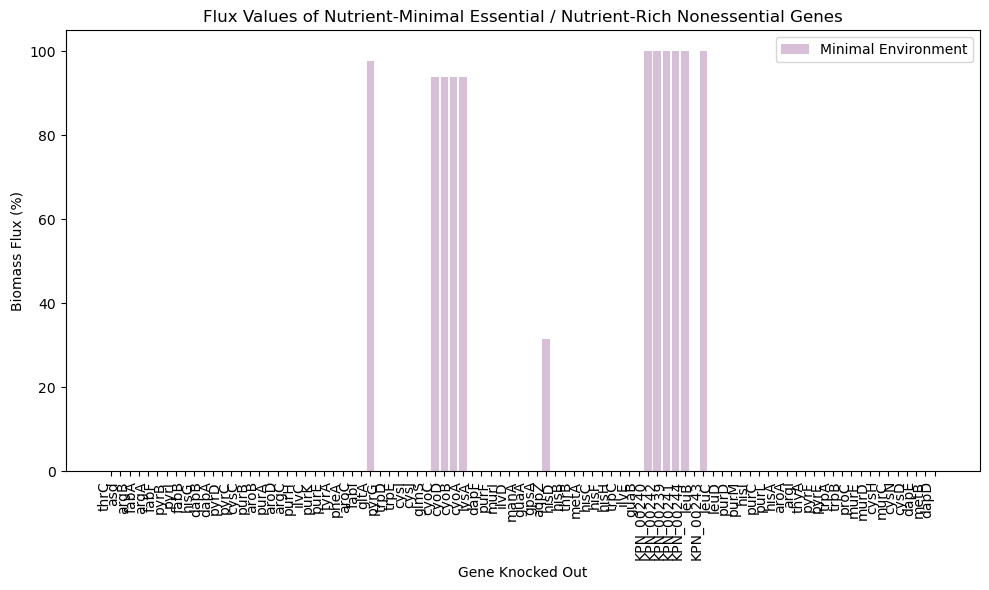

In [19]:
# Function to normalize flux values as percentage of a reference flux
def normalize_fluxes(fluxes, reference_flux):
    return [(flux / reference_flux) * 100 for flux in fluxes]

# Store gene names and corresponding flux values in pneu_model
gene_names = []
flux_values_pneu = []

# Store gene names and corresponding flux values in pneu2_model
flux_values_pneu2 = []

for i, gene in enumerate(pneu_model.genes):
    with pneu_model:
        pneu_model.genes[i].knock_out()  # Knock out gene by position in the list
        solution_pneu = pneu_model.optimize()
        if solution_pneu.objective_value < 1.8:
            # Checking against pneu2_model
            with pneu2_model:
                pneu2_model.genes[i].knock_out()  # Knock out the same gene in pneu2_model
                solution_pneu2 = pneu2_model.optimize()
                if solution_pneu2.objective_value > 66.7:
                    gene_names.append(gene.name)
                    flux_values_pneu.append(solution_pneu.objective_value)
                    flux_values_pneu2.append(solution_pneu2.objective_value)

# Normalize flux values
reference_flux_pneu = 1.8
flux_values_pneu_percent = normalize_fluxes(flux_values_pneu, reference_flux_pneu)


# Plot genes with percentages
plt.figure(figsize=(10, 6))
plt.bar(gene_names, flux_values_pneu_percent, color='thistle', label='Minimal Environment')
plt.xlabel('Gene Knocked Out')
plt.ylabel('Biomass Flux (%)')
plt.title('Flux Values of Nutrient-Minimal Essential / Nutrient-Rich Nonessential Genes')
plt.legend()
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

#save figure as .png
plt.savefig("different_genes.png")
plt.show()